In [1]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import time
from scipy.misc import imread
from scipy.misc import imresize
import matplotlib.image as mpimg
from scipy.ndimage import filters
import urllib
from numpy import random
import sys
import pickle
import os
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
# Load the MNIST digit data
M = loadmat("mnist_all.mat")

In [2]:
def softmax(y):
    return exp(y) / tile(sum(exp(y), 0), (len(y), 1))

In [3]:
def cost_function(y, p):
    return -np.sum(y * np.log(p))

In [4]:
def part2(x, W0, b0):
    #this implementations concatenates the bias vector and the weights , and then outputs the result of dimension (10, 1)
    total_W0 = np.concatenate((b0, W0))
    added_ones = np.ones(x.shape[1]).reshape(x.shape[1], 1)
    total_x = np.concatenate((added_ones.T, x))
    vals = softmax(np.dot(total_W0.T, total_x))
    return vals

def part3(x, y1, p):
    #print("P3", x.shape, y1.shape, p.shape)
    deriv = np.subtract(p, y1)
    added_ones = np.ones(x.shape[1]).reshape(x.shape[1], 1)
    total_x = np.concatenate((added_ones.T, x))
    #print(deriv.shape, total_x.T.shape)
    deriv = np.matmul(deriv, total_x.T).T
    return deriv  # shape 784, 10

In [5]:
def get_data(M):
    train_keys = [key for key in M.keys() if "train" in key]
    data_length = 0
    for train_k in train_keys:
        data_length += M[train_k].shape[0]

    # concatenate all the data
    train_data = np.zeros((data_length, 784))
    data_counter = 0
    data_size = 0

    train_y = np.zeros((data_length, 10))
    for i, train_k in enumerate(train_keys):
        data_size = M[train_k].shape[0]
        #print(i, data_size)
        train_data[data_counter: data_counter + data_size, :] = M[train_k]
        train_y[data_counter: data_counter + data_size, i] = 1
        data_counter += data_size
    return train_data, train_y


def df(x, W0, y):
    # this W0 is assumed to have the bias incorperated into it
    W1, b0 = W0[:-1, :].reshape(784, W0.shape[1]), W0[-1, :].reshape(1, 10)
    #W1, b0 = W0[1:, :].reshape(784, W0.shape[1]), W0[0, :].reshape(1, 10)

    vals = part2(x, W1, b0)
    #print(vals.shape, "df")
    return part3(x, y, vals)

In [6]:
# PART ONE DATA SNIPPIT
# Load sample weights for the multilayer neural network
snapshot = pickle.load(open("snapshot50.pkl", "rb"), encoding="latin-1")
W0 = snapshot["W0"]  # data
b0 = snapshot["b0"].reshape((300, 1))  # bias?
W1 = snapshot["W1"]  # should be likelihoods?
b1 = snapshot["b1"].reshape((10, 1))  # classes?
#print(W0.shape)

np.random.seed(0)
weights = np.random.random(size=784*10).reshape((784, 10))
weights_bias = np.zeros(10).reshape(1, 10)
#np.random.random(size=10).reshape((1, 10))

# PART TWO - SINGLE LAYER NN
x = M["train5"][148:149].T
x = x / 255.
output = part2(x, weights, weights_bias)
# print(output)

# PART TWO - SINGLE LAYER NN
x = M["train5"][148:149].T / 255./ 255.
output = part2(x, weights, weights_bias)
output = output.reshape(10,1)
print(output.shape)
#print(output)
y = np.zeros((10, 1))
y[5, 0] = 1.
print(x.shape)

# PART THREE _ FINITE DIFFS
cost = cost_function(y, output)

h = 0.0001
#'''
for i in range(5):
    place = 215 + i
    weights2 = weights.copy()
    weights2[place, 5] += h
    output2 = part2(x, weights2, weights_bias)
    #print(output2)
    output2 = output2.reshape(10,1)
    cost2 = cost_function(y, output2)
    #print(cost, cost2)
    print("Finite Diff", (cost2 - cost) / h)
    real_diff = part3(x, y, output)
    print("Real Diff", real_diff[place+1, 5])
    #'''
    #break

(10, 1)
(784, 1)
Finite Diff -0.000844740868367
Real Diff -0.000844740871903
Finite Diff -0.00109400866588
Real Diff -0.00109400867017
Finite Diff -0.00109400866588
Real Diff -0.00109400867017
Finite Diff -0.00202183878528
Real Diff -0.00202183880816
Finite Diff -0.0024234368956
Real Diff -0.00242343692759


In [7]:
def grad_descent(df, x, y, W0, b0, alpha, EPS=1e-7, max_iter = 1000):
    # EPS = 1e-5   #EPS = 10**(-5)
    start = time.time()
    total_W0 = np.concatenate((b0, W0))
    prev_totalW0 = total_W0 - 10 * EPS
    W1 = total_W0.copy()
    # inital weights, pass in both bias and weights together for now
    #max_iter = 1000
    iter = 0
    while norm(W1 - prev_totalW0) > EPS and iter < max_iter:
        prev_totalW0 = W1.copy()
        W1 -= alpha * df(x, W1, y)
        if iter % 100 == 0:
            print("Iter", iter)
            # print "x = (%.3f, %.3f, %.3f), f(x) = %.3f" % (t[0], t[1], t[2], f(x, y, t))
            # print "Gradient: ", df(x, y, t), "\n"
             # EPS = 1e-5   #EPS = 10**(-5)
            '''
            added_ones = np.ones((x.shape[1], 1))
            print(added_ones.shape, x.shape)
            #print(testX.shape, added_ones.T.shape)
            #totaltestX = np.vstack((testX, ))
            totaltestX = np.concatenate((x,added_ones.T), axis=0)
            print(totaltestX.shape)
            #print (final_weights.shape, totaltestX.shape)
            preds = np.matmul(totaltestX.T, W1)

            preds_max =  preds.max(axis = 1)
            final_preds = np.isin(preds, preds_max).astype(int)
            #how many of the hot keys match for validation
            print(y.T.shape, final_preds.shape)
            print(len(np.where((y.T == final_preds).all(axis =1)==True)[0]))
            '''
        iter += 1
    print("Iter", iter)
    end = time.time()
    print("Time taken:", (end - start))
    return W1


def part4(data, W0, b0, y, alpha=0.01, max_iter = 1000):
    np.random.seed(0)
    #alpha = 0.01
    final_weights = grad_descent(df, data, y, W0, b0, alpha, 1e-4, max_iter)
    return final_weights

In [8]:
##PART FOUR##
trainX, trainY = get_data(M)
print(np.where(trainX==np.nan))
trainX = trainX.T/255. /255.

print(trainX.shape, trainY.shape)
#use a subset to get faster results
trainX = trainX.T
trainX_small, trainX_large, trainY_small, trainY_large = train_test_split(trainX, trainY,
                                                  random_state = 0, stratify = trainY, test_size = 0.9)
trainX_small = trainX_small.T
print(trainX_small.shape, trainY_small.shape)
trainX = trainX.T
print("TrainX", trainX.shape)
np.random.seed(0)
weights = np.random.random(size=784*10).reshape((784, 10))
weights = np.ones_like(weights)
weights_bias = np.zeros(10).reshape(1, 10)

final_weights = part4(trainX_small, weights, weights_bias, trainY_small.T, alpha=1.5, max_iter=100)
#grad_descent(df, trainX, trainY, weights, weights_bias, 0.01)


(array([], dtype=int64), array([], dtype=int64))
(784, 60000) (60000, 10)
(784, 6000) (6000, 10)
TrainX (784, 60000)
Iter 0
Iter 100
Time taken: 4.460383176803589


(785, 10)


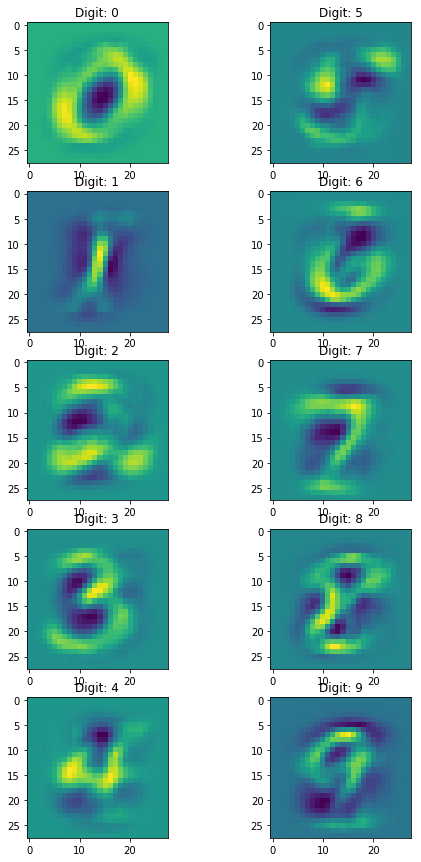

In [9]:
print(final_weights.shape)
#discard the last element, as that is the bias term
fig , ax= plt.subplots(5, 2, figsize=(8,15))
for i in range(10):
    #print(i//5, i%5)
    ax[i%5, i//5].imshow(final_weights[1:, i].reshape(28, 28))
    ax[i%5, i//5].set_title("Digit: {0}".format(i))
    # .title("Number {0}".format(i))
    #print(final_weights[100:110, i])
#plt.colorbar()
plt.show()

#rint(final_weights[:-1, 7])
#plt.imshow(final_weights[:-1, 7].reshape(28, 28))
#plt.show()

In [10]:
#plot learning curves
#collect testing data
def get_test_data(M):
    train_keys = [key for key in M.keys() if "test" in key]
    data_length = 0
    for train_k in train_keys:
        data_length += M[train_k].shape[0]

    # concatenate all the data
    train_data = np.zeros((data_length, 784))
    print(data_length)
    data_counter = 0
    data_size = 0

    train_y = np.zeros((data_length, 10))
    for i, train_k in enumerate(train_keys):
        data_size = M[train_k].shape[0]
        print(i, data_size)
        train_data[data_counter: data_counter + data_size, :] = M[train_k]
        train_y[data_counter: data_counter + data_size, i] = 1
        data_counter += data_size
    return train_data, train_y

testX, testY = get_test_data(M)
testX = testX/255./255.

10000
0 980
1 1135
2 1032
3 1010
4 982
5 892
6 958
7 1028
8 974
9 1009


In [11]:
added_ones = np.ones((testX.shape[0], 1))
#print(testX.shape, added_ones.T.shape)
#totaltestX = np.vstack((testX, ))
totaltestX = np.concatenate((testX,added_ones), axis=1)
#print(totaltestX.shape)
#print (final_weights.shape, totaltestX.shape)
preds = np.matmul(totaltestX, final_weights)

preds_max =  preds.max(axis = 1)
final_preds = np.isin(preds, preds_max).astype(int)
#how many of the hot keys match for validation
print(testY.shape, final_preds.shape)
print(len(np.where((testY == final_preds).all(axis =1)==True)[0]))

(10000, 10) (10000, 10)
8573


Plot the learning curves with these set of parameters every 400 iterations, see how the performance changes

In [16]:
def grad_descent_learn(df, x, y, W0, b0, testX, testY, alpha, EPS=1e-7, max_iter = 1000):
    # EPS = 1e-5   #EPS = 10**(-5)
    start = time.time()
    total_W0 = np.concatenate((b0, W0))
    prev_totalW0 = total_W0 - 10 * EPS
    W1 = total_W0.copy()
    # inital weights, pass in both bias and weights together for now
    #max_iter = 1000
    iter = 0
    perform_train = np.zeros(max_iter//100 +1)
    perform_test = np.zeros(max_iter//100 +1)
    counter = 1
    while norm(W1 - prev_totalW0) > EPS and iter < max_iter:
        prev_totalW0 = W1.copy()
        W1 -= alpha * df(x, W1, y)
        if iter % 100 == 0:
            print("Iter", iter)
            added_ones = np.ones((x.shape[1], 1))
            totaltestX = np.concatenate((x,added_ones.T), axis=0)
            preds = np.matmul(totaltestX.T, W1)

            preds_max =  preds.max(axis = 1)
            final_preds = np.isin(preds, preds_max).astype(int)
            print(len(np.where((y.T == final_preds).all(axis =1)==True)[0]))
            #print(final_preds.shape)
            perform_train[counter ]= len(np.where((y.T == final_preds).all(axis =1)==True)[0])/ float(final_preds.shape[0])
            added_ones = np.ones((testX.shape[1], 1))
            totaltestX = np.concatenate((testX,added_ones.T), axis=0)
            preds = np.matmul(totaltestX.T, W1)

            preds_max =  preds.max(axis = 1)
            final_preds = np.isin(preds, preds_max).astype(int)
            print(len(np.where((testY == final_preds).all(axis =1)==True)[0]))
            perform_test[counter] = len(np.where((testY == final_preds).all(axis =1)==True)[0])/float(final_preds.shape[0])
            counter +=1
        iter += 1
    print("Iter", iter)
    end = time.time()
    print("Time taken:", (end - start))
    return W1, perform_train, perform_test


def part4b(data, W0, b0, y, testX, testY ,  alpha=0.01, max_iter = 1000):
    np.random.seed(0)
    #alpha = 0.01
    final_weights = grad_descent_learn(df, data, y, W0, b0, testX, testY, alpha, 1e-4, max_iter)
    return final_weights

In [24]:
weights = np.random.random(size=784*10).reshape((784, 10))
weights = np.ones_like(weights)
weights_bias = np.zeros(10).reshape(1, 10)
#final_weights = part4(trainX_small, weights, weights_bias, trainY_small.T, alpha=1.5, max_iter=100)
print(trainX_small.shape, testX.shape)
final_weights2, performance_train, performance_test = part4b(trainX, weights, weights_bias, trainY.T, testX.T, testY, alpha = 1.0, max_iter=6500)

(784, 6000) (10000, 784)
Iter 0
36997
6205
Iter 100
53761
9019
Iter 200
54320
9089
Iter 300
54549
9132
Iter 400
54663
9139
Iter 500
54779
9147
Iter 600
54874
9147
Iter 700
54896
9145
Iter 800
54945
9161
Iter 900
54965
9153
Iter 1000
54998
9150
Iter 1100
55036
9148
Iter 1200
55062
9151
Iter 1300
55064
9151
Iter 1400
55042
9151
Iter 1500
55057
9149
Iter 1600
55064
9146
Iter 1700
55054
9145
Iter 1800
55038
9139
Iter 1900
55037
9145
Iter 2000
55021
9145
Iter 2100
55000
9139
Iter 2200
55004
9136
Iter 2300
54996
9136
Iter 2400
54960
9133
Iter 2500
54907
9137
Iter 2600
54855
9124
Iter 2700
54820
9116
Iter 2800
54795
9115
Iter 2900
54769
9109
Iter 3000
54742
9110
Iter 3100
54693
9101
Iter 3200
54646
9104
Iter 3300
54617
9109
Iter 3400
54549
9102
Iter 3500
54517
9094
Iter 3600
54463
9093
Iter 3700
54413
9084
Iter 3800
54367
9076
Iter 3900
54312
9073
Iter 4000
54242
9066
Iter 4100
54158
9054
Iter 4200
54081
9045
Iter 4300
54007
9037
Iter 4400
53929
9021
Iter 4500
53880
9020
Iter 4600
53814
9018


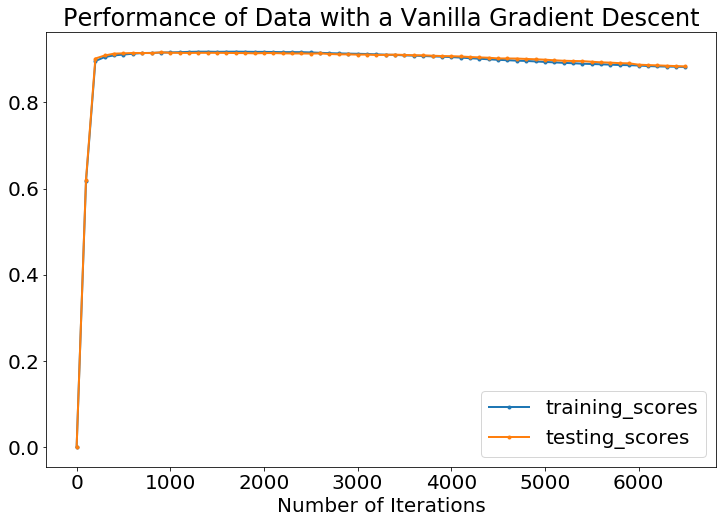

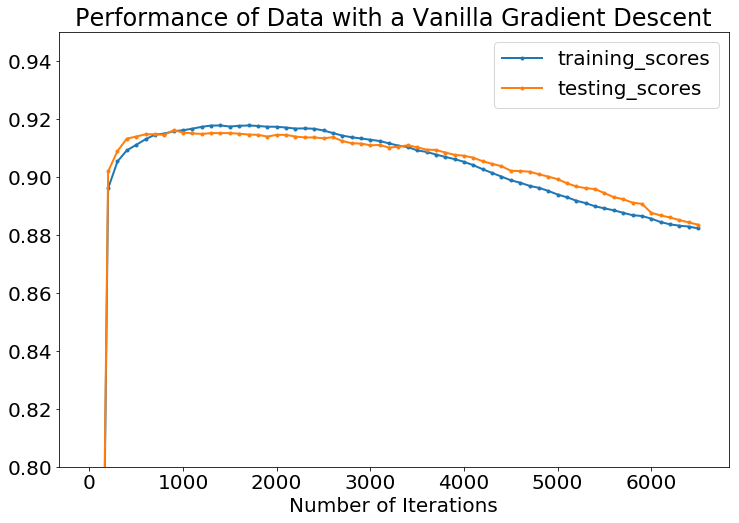

In [36]:
iterations = np.arange(6500//100 +1)*100
#print(iterations)
matplotlib.rcParams.update({'font.size': 20})
#print(performance_train)
#print(performance_test)
plt.figure(figsize=(12, 8))
plt.title("Performance of Data with a Vanilla Gradient Descent")
plt.plot(iterations, performance_train, label = "training_scores", marker='.', linewidth = 2)
plt.plot(iterations, performance_test, label = "testing_scores", marker='.', linewidth = 2)
plt.xlabel("Number of Iterations")
plt.legend()
plt.show()
#plt.savefig("")
#ave the datalines

#print(iterations)
#print(performance_train)
#print(performance_test)
plt.figure(figsize=(12, 8))
plt.title("Performance of Data with a Vanilla Gradient Descent")
plt.plot(iterations, performance_train, label = "training_scores", marker='.', linewidth = 2)
plt.plot(iterations, performance_test, label = "testing_scores", marker='.', linewidth = 2)
plt.xlabel("Number of Iterations")
plt.legend()
plt.ylim([0.80, .95])
plt.show()
#plt.savefig("")
#ave the datalines

In [32]:
print(performance_train, performance_test)
np.savetxt("performance_train_p4.txt", performance_train)
np.savetxt("performance_test_p4.txt", performance_test)

[ 0.          0.61661667  0.89601667  0.90533333  0.90915     0.91105
  0.91298333  0.91456667  0.91493333  0.91575     0.91608333  0.91663333
  0.91726667  0.9177      0.91773333  0.91736667  0.91761667  0.91773333
  0.91756667  0.9173      0.91728333  0.91701667  0.91666667  0.91673333
  0.9166      0.916       0.91511667  0.91425     0.91366667  0.91325
  0.91281667  0.91236667  0.91155     0.91076667  0.91028333  0.90915
  0.90861667  0.90771667  0.90688333  0.90611667  0.9052      0.90403333
  0.90263333  0.90135     0.90011667  0.89881667  0.898       0.8969
  0.89623333  0.89516667  0.89391667  0.89296667  0.89178333  0.89093333
  0.88985     0.88913333  0.88846667  0.88761667  0.88678333  0.8865
  0.8856      0.88441667  0.88363333  0.88316667  0.88286667  0.88223333] [ 0.      0.6205  0.9019  0.9089  0.9132  0.9139  0.9147  0.9147  0.9145
  0.9161  0.9153  0.915   0.9148  0.9151  0.9151  0.9151  0.9149  0.9146
  0.9145  0.9139  0.9145  0.9145  0.9139  0.9136  0.9136  0.9133  0